In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/Motor_Vehicle_Collisions_Person.csv', low_memory=False)

In [23]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df['CRASH_DATETIME'] = pd.to_datetime(df['CRASH_DATE'].astype(str) + ' ' + df['CRASH_TIME'])
df.drop(['CRASH_DATE','CRASH_TIME','UNIQUE_ID','PERSON_ID','VEHICLE_ID'],axis = 1,inplace = True)


In [24]:
df.shape

(5817930, 17)

In [25]:
df.drop_duplicates()

,COLLISION_ID,PERSON_TYPE,PERSON_INJURY,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX,CRASH_DATETIME
0,4229554,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U,2019-10-26 09:43:00
1,4230587,Occupant,Unspecified,33,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F,2019-10-25 15:15:00
2,4230550,Occupant,Unspecified,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M,2019-10-26 17:55:00
3,3565527,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN,2016-11-21 13:05:00
4,4231168,Occupant,Unspecified,7,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F,2019-10-25 11:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817925,4856046,Occupant,Unspecified,67,Not Ejected,Does Not Apply,Does Not Apply,Driver,Unknown,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M,2025-11-09 14:30:00
5817926,4856049,Occupant,Unspecified,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M,2025-11-09 15:30:00
5817927,4856048,Occupant,Unspecified,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M,2025-11-09 14:43:00
5817928,4856218,Occupant,Unspecified,29,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M,2025-11-09 13:12:00


In [26]:
df.shape

(5817930, 17)

In [27]:
df.describe()

,COLLISION_ID,CRASH_DATETIME
count,5.817930e+06,5817930
mean,4.015949e+06,2019-08-04 09:12:03.741278464
min,3.700000e+01,2012-07-01 00:05:00
25%,3.705290e+06,2017-06-29 13:00:00
50%,4.060170e+06,2019-01-07 18:09:00
75%,4.438548e+06,2021-07-15 22:00:00
max,4.856656e+06,2025-11-09 23:50:00
std,6.648132e+05,NaN


In [28]:
df['PED_LOCATION'].value_counts(dropna=False)

PED_LOCATION
NaN                                                          5715663
Pedestrian/Bicyclist/Other Pedestrian at Intersection          62707
Pedestrian/Bicyclist/Other Pedestrian Not at Intersection      32596
Does Not Apply                                                  4085
Unknown                                                         2879
Name: count, dtype: int64

In [29]:
df['PED_ACTION'].value_counts(dropna=False)


PED_ACTION
NaN                                                5715764
Crossing With Signal                                 38632
Crossing, No Signal, or Crosswalk                    17073
Crossing, No Signal, Marked Crosswalk                 8926
Other Actions in Roadway                              8042
Crossing Against Signal                               6996
Unknown                                               4867
Not in Roadway                                        4837
Does Not Apply                                        4514
Emerging from in Front of/Behind Parked Vehicle       3082
Working in Roadway                                    1521
Getting On/Off Vehicle Other Than School Bus          1388
Riding/Walking Along Highway With Traffic             1032
Playing in Roadway                                     578
Riding/Walking Along Highway Against Traffic           344
Pushing/Working on Car                                 254
Going to/From Stopped School Bus             

In [30]:
df['CONTRIBUTING_FACTOR_1'].value_counts(dropna=False)

CONTRIBUTING_FACTOR_1
NaN                                                      5717042
Unspecified                                                70478
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      15602
Driver Inattention/Distraction                              3857
Failure to Yield Right-of-Way                               2654
Traffic Control Disregarded                                 1668
Alcohol Involvement                                         1429
Other Vehicular                                             1371
View Obstructed/Limited                                      674
Cell Phone (hand-Held)                                       372
Backing Unsafely                                             289
Passing or Lane Usage Improper                               270
Passenger Distraction                                        224
Passing Too Closely                                          217
Aggressive Driving/Road Rage                                 206
Uns

In [31]:
df['CONTRIBUTING_FACTOR_2'].value_counts(dropna=False)

CONTRIBUTING_FACTOR_2
NaN                                                      5717175
Unspecified                                                88228
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion       4470
Driver Inattention/Distraction                              1566
Failure to Yield Right-of-Way                               1402
Traffic Control Disregarded                                 1239
Other Vehicular                                              760
Alcohol Involvement                                          503
View Obstructed/Limited                                      490
Cell Phone (hand-Held)                                       196
Passing or Lane Usage Improper                               193
Driver Inexperience                                          164
Unsafe Speed                                                 161
Passing Too Closely                                          138
Following Too Closely                                        134
Bac

In [32]:
print("🔍 ANALYZING PED_ROLE COLUMN:")
print("=" * 50)

# Check missing values and current distribution
total_rows = len(df)
missing_count = df['PED_ROLE'].isnull().sum()
missing_percent = (missing_count / total_rows) * 100

print(f"Total rows: {total_rows:,}")
print(f"Missing values: {missing_count:,} ({missing_percent:.2f}%)")
print(f"Non-missing values: {df['PED_ROLE'].notnull().sum():,}")

# Check current value distribution
print("\n📊 Current PED_ROLE distribution:")
current_dist = df['PED_ROLE'].value_counts(dropna=False)
print(current_dist)

# Check data type
print(f"\nData type: {df['PED_ROLE'].dtype}")

🔍 ANALYZING PED_ROLE COLUMN:
Total rows: 5,817,930
Missing values: 194,889 (3.35%)
Non-missing values: 5,623,041

📊 Current PED_ROLE distribution:
PED_ROLE
Registrant         2412541
Driver             2140252
Passenger           845558
NaN                 194889
Pedestrian          100352
Witness              79239
Owner                30484
Notified Person       9829
Policy Holder         2415
Other                 1954
In-Line Skater         417
Name: count, dtype: int64

Data type: object


In [33]:
print("🤖 SMART ROLE ASSIGNMENT:")
print("=" * 50)

# Create a copy for safe modification
df['PED_ROLE_ENHANCED'] = df['PED_ROLE'].copy()

# Define the condition
driver_condition = (df['PERSON_TYPE'] == 'Occupant') & (df['PERSON_INJURY'] == 'Injured')

# Count how many rows will be affected
rows_to_update = driver_condition.sum()
current_drivers = (driver_condition & (df['PED_ROLE_ENHANCED'] == 'Driver')).sum()
non_drivers = rows_to_update - current_drivers

print(f"📊 Update summary:")
print(f"   - Total injured occupants: {rows_to_update:,}")
print(f"   - Already marked as Driver: {current_drivers:,}")
print(f"   - Will be updated to Driver: {non_drivers:,}")

# Apply the update only to non-Driver injured occupants
update_condition = driver_condition & (df['PED_ROLE_ENHANCED'] != 'Driver')
df.loc[update_condition, 'PED_ROLE_ENHANCED'] = 'Driver'

print(f"✅ Updated {update_condition.sum():,} records to 'Driver'")

🤖 SMART ROLE ASSIGNMENT:
📊 Update summary:
   - Total injured occupants: 521,247
   - Already marked as Driver: 232,222
   - Will be updated to Driver: 289,025
✅ Updated 289,025 records to 'Driver'


In [34]:
df['PED_ROLE_copy'] = df['PED_ROLE'].copy()

if 'PERSON_TYPE' in df.columns:
    mask = (df['PERSON_TYPE'] == 'Pedestrian') & (df['PED_ROLE'].isnull())
    df.loc[mask, 'PED_ROLE_copy'] = 'Pedestrian'
    print(f"✅ Inferred {mask.sum():,} missing values as 'Pedestrian' from PERSON_TYPE")

✅ Inferred 41,744 missing values as 'Pedestrian' from PERSON_TYPE


In [35]:
df['PED_ROLE_mask'] = df['PED_ROLE'].copy()

if 'PERSON_TYPE' in df.columns:
    # Case-insensitive comparison for bicyclist
    mask = (df['PERSON_TYPE'].str.lower() == 'bicyclist') & (df['PERSON_INJURY'].str.lower() == 'injured') & (df['PED_ROLE'].isnull())
    df.loc[mask, 'PED_ROLE_mask'] = 'Bicyclist'
    print(f"✅ Inferred {mask.sum():,} missing values as 'Bicyclist' from PERSON_TYPE")

✅ Inferred 15,020 missing values as 'Bicyclist' from PERSON_TYPE


In [36]:
print("🔄 COMBINING ALL PED_ROLE COLUMNS:")
print("=" * 50)

# Create a final combined column
df['PED_ROLE_FINAL'] = df['PED_ROLE'].copy()  # Start with original

# Step 1: Apply the enhanced logic (only where original is NaN)
enhanced_condition = df['PED_ROLE_ENHANCED'] != df['PED_ROLE']  # Where enhancements were made
df.loc[enhanced_condition, 'PED_ROLE_FINAL'] = df.loc[enhanced_condition, 'PED_ROLE_ENHANCED']

print(f"✅ Applied PED_ROLE_ENHANCED updates: {enhanced_condition.sum():,} rows")

# Step 2: Apply copy column updates (only where final is still NaN)
if 'PED_ROLE_copy' in df.columns:
    copy_updates = df['PED_ROLE_FINAL'].isnull() & df['PED_ROLE_copy'].notnull()
    df.loc[copy_updates, 'PED_ROLE_FINAL'] = df.loc[copy_updates, 'PED_ROLE_copy']
    print(f"✅ Applied PED_ROLE_copy updates: {copy_updates.sum():,} rows")

# Step 3: Apply mask updates (only where final is still NaN)
if 'PED_ROLE_mask' in df.columns:
    mask_updates = df['PED_ROLE_FINAL'].isnull() & df['PED_ROLE_mask'].notnull()
    df.loc[mask_updates, 'PED_ROLE_FINAL'] = df.loc[mask_updates, 'PED_ROLE_mask']
    print(f"✅ Applied PED_ROLE_mask updates: {mask_updates.sum():,} rows")

# Step 4: Fill remaining NaN with 'Unknown'
remaining_nan = df['PED_ROLE_FINAL'].isnull().sum()
df['PED_ROLE_FINAL'] = df['PED_ROLE_FINAL'].fillna('Other')

print(f"✅ Filled remaining {remaining_nan:,} NaN values with 'Other'")

# Final summary
print(f"\n🎉 FINAL RESULT:")
print(f"   - Total rows: {len(df):,}")
print(f"   - Missing values: {df['PED_ROLE_FINAL'].isnull().sum():,}")
print(f"   - Unique values: {df['PED_ROLE_FINAL'].nunique()}")
print(f"\n📊 Final distribution:")
print(df['PED_ROLE_FINAL'].value_counts())

🔄 COMBINING ALL PED_ROLE COLUMNS:
✅ Applied PED_ROLE_ENHANCED updates: 346,263 rows
✅ Applied PED_ROLE_copy updates: 41,744 rows
✅ Applied PED_ROLE_mask updates: 15,020 rows
✅ Filled remaining 474 NaN values with 'Other'

🎉 FINAL RESULT:
   - Total rows: 5,817,930
   - Missing values: 0
   - Unique values: 11

📊 Final distribution:
PED_ROLE_FINAL
Driver             2429277
Registrant         2412541
Passenger           695733
Pedestrian          142096
Witness              79239
Owner                30484
Bicyclist            15020
Notified Person       9829
Policy Holder         2415
Other                 1207
In-Line Skater          89
Name: count, dtype: int64


In [37]:
df[['PED_ROLE_FINAL','PERSON_TYPE']].value_counts(dropna=False)

PED_ROLE_FINAL   PERSON_TYPE    
Registrant       Occupant           2412541
Driver           Occupant           2356112
Passenger        Occupant            693629
Pedestrian       Pedestrian          142096
Witness          Occupant             79239
Driver           Bicyclist            61744
Owner            Occupant             30484
Bicyclist        Bicyclist            15020
Driver           Other Motorized      11421
Notified Person  Occupant              9829
Policy Holder    Occupant              2415
Passenger        Bicyclist             1325
Other            Occupant              1150
Passenger        Other Motorized        779
In-Line Skater   Occupant                89
Other            Bicyclist               57
Name: count, dtype: int64

In [38]:
df.head(10)

,COLLISION_ID,PERSON_TYPE,PERSON_INJURY,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,...,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX,CRASH_DATETIME,PED_ROLE_ENHANCED,PED_ROLE_copy,PED_ROLE_mask,PED_ROLE_FINAL
0,4229554,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Registrant,NaN,NaN,U,2019-10-26 09:43:00,Registrant,Registrant,Registrant,Registrant
1,4230587,Occupant,Unspecified,33,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,...,Does Not Apply,Passenger,NaN,NaN,F,2019-10-25 15:15:00,Passenger,Passenger,Passenger,Passenger
2,4230550,Occupant,Unspecified,55,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Registrant,NaN,NaN,M,2019-10-26 17:55:00,Registrant,Registrant,Registrant,Registrant
3,3565527,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Notified Person,NaN,NaN,NaN,2016-11-21 13:05:00,Notified Person,Notified Person,Notified Person,Notified Person
4,4231168,Occupant,Unspecified,7,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,...,Does Not Apply,Passenger,NaN,NaN,F,2019-10-25 11:16:00,Passenger,Passenger,Passenger,Passenger
5,4230743,Occupant,Injured,27,Not Ejected,Conscious,Back,Driver,Lap Belt & Harness,NaN,...,Complaint of Pain or Nausea,Driver,NaN,NaN,M,2019-10-24 19:15:00,Driver,Driver,Driver,Driver
6,4230047,Occupant,Unspecified,41,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Registrant,NaN,NaN,F,2019-10-26 16:45:00,Registrant,Registrant,Registrant,Registrant
7,4229547,Pedestrian,Injured,24,NaN,Conscious,Shoulder - Upper Arm,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,None Visible,Pedestrian,Unspecified,Unspecified,F,2019-10-26 01:15:00,Pedestrian,Pedestrian,Pedestrian,Pedestrian
8,4229808,Occupant,Unspecified,36,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt & Harness,NaN,...,Does Not Apply,Driver,NaN,NaN,M,2019-10-26 13:04:00,Driver,Driver,Driver,Driver
9,4230915,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Registrant,NaN,NaN,U,2019-10-24 08:20:00,Registrant,Registrant,Registrant,Registrant


In [39]:
df['PERSON_AGE'].value_counts(dropna=False)

PERSON_AGE
NaN      649706
0        548030
30       119046
29       118070
28       117490
          ...  
-146          1
9,122         1
3,004         1
3,078         1
3,024         1
Name: count, Length: 908, dtype: int64

In [40]:
# SHOW OUTLIERS FOR AGES 1-91
print("OUTLIERS FOR AGE RANGE 1-91")
print("=" * 40)

# Define realistic age range
min_age = 1
max_age = 91

# Convert PERSON_AGE to numeric (coerce invalid strings to NaN) to avoid TypeError
df['PERSON_AGE'] = pd.to_numeric(df['PERSON_AGE'], errors='coerce')

# Count outliers (comparisons with NaN produce False)
too_young = (df['PERSON_AGE'] < min_age).sum()
too_old = (df['PERSON_AGE'] > max_age).sum()
total_outliers = too_young + too_old
total_records = len(df)

print(f"Total records: {total_records:,}")
print(f"Ages < {min_age}: {too_young:,} ({too_young/total_records*100:.3f}%)")
print(f"Ages > {max_age}: {too_old:,} ({too_old/total_records*100:.3f}%)")
print(f"Total outliers: {total_outliers:,} ({total_outliers/total_records*100:.3f}%)")

# Show specific outlier values
print(f"\n🔍 SPECIFIC OUTLIER VALUES:")

# Show youngest outliers (display original values from PERSON_AGE)
young_outliers = df.loc[df['PERSON_AGE'] < min_age, 'PERSON_AGE']
if len(young_outliers) > 0:
    print(f"\nAges below {min_age}:")
    print(young_outliers.value_counts().sort_index().head(10))

# Show oldest outliers (display original values from PERSON_AGE)
old_outliers = df.loc[df['PERSON_AGE'] > max_age, 'PERSON_AGE']
if len(old_outliers) > 0:
    print(f"\nAges above {max_age}:")
    print(old_outliers.value_counts().sort_index().head(10))

OUTLIERS FOR AGE RANGE 1-91
Total records: 5,817,930
Ages < 1: 549,325 (9.442%)
Ages > 91: 5,822 (0.100%)
Total outliers: 555,147 (9.542%)

🔍 SPECIFIC OUTLIER VALUES:

Ages below 1:
PERSON_AGE
-999.0    8
-997.0    2
-996.0    1
-992.0    2
-991.0    1
-990.0    3
-989.0    1
-987.0    1
-982.0    3
-980.0    1
Name: count, dtype: int64

Ages above 91:
PERSON_AGE
92.0     869
93.0     599
94.0     424
95.0     311
96.0     198
97.0     140
98.0     137
99.0     781
100.0     92
101.0     32
Name: count, dtype: int64


In [41]:
missing_values = df.isnull().sum()
print(missing_values)

COLLISION_ID                   0
PERSON_TYPE                    0
PERSON_INJURY                  0
PERSON_AGE                651481
EJECTION                 2826666
EMOTIONAL_STATUS         2729747
BODILY_INJURY            2729704
POSITION_IN_VEHICLE      2826210
SAFETY_EQUIPMENT         3029317
PED_LOCATION             5715663
PED_ACTION               5715764
COMPLAINT                2729697
PED_ROLE                  194889
CONTRIBUTING_FACTOR_1    5717042
CONTRIBUTING_FACTOR_2    5717175
PERSON_SEX                643311
CRASH_DATETIME                 0
PED_ROLE_ENHANCED          57238
PED_ROLE_copy             153145
PED_ROLE_mask             179869
PED_ROLE_FINAL                 0
dtype: int64


In [42]:
# SHOW IQR OUTLIERS ONLY
print("IQR OUTLIER DETECTION")
print("=" * 30)

age_data = df['PERSON_AGE']

# Calculate IQR
Q1 = age_data.quantile(0.25)
Q3 = age_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count IQR outliers
iqr_outliers = ((age_data < lower_bound) | (age_data > upper_bound)).sum()

print(f"Q1 (25th percentile): {Q1:.1f}")
print(f"Q3 (75th percentile): {Q3:.1f}")
print(f"IQR: {IQR:.1f}")
print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound:.1f}")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound:.1f}")
print(f"IQR outliers: {iqr_outliers:,} ({iqr_outliers/len(age_data)*100:.2f}%)")

# Show outlier examples
print(f"\nIQR Outlier Examples:")
lower_outliers = age_data[age_data < lower_bound]
upper_outliers = age_data[age_data > upper_bound]

if len(lower_outliers) > 0:
    print(f"Ages below {lower_bound:.1f}:")
    print(lower_outliers.value_counts().sort_index().head(5))

if len(upper_outliers) > 0:
    print(f"Ages above {upper_bound:.1f}:")
    print(upper_outliers.value_counts().sort_index().head(5))

IQR OUTLIER DETECTION
Q1 (25th percentile): 24.0
Q3 (75th percentile): 51.0
IQR: 27.0
Lower bound (Q1 - 1.5*IQR): -16.5
Upper bound (Q3 + 1.5*IQR): 91.5
IQR outliers: 7,117 (0.12%)

IQR Outlier Examples:
Ages below -16.5:
PERSON_AGE
-999.0    8
-997.0    2
-996.0    1
-992.0    2
-991.0    1
Name: count, dtype: int64
Ages above 91.5:
PERSON_AGE
92.0    869
93.0    599
94.0    424
95.0    311
96.0    198
Name: count, dtype: int64


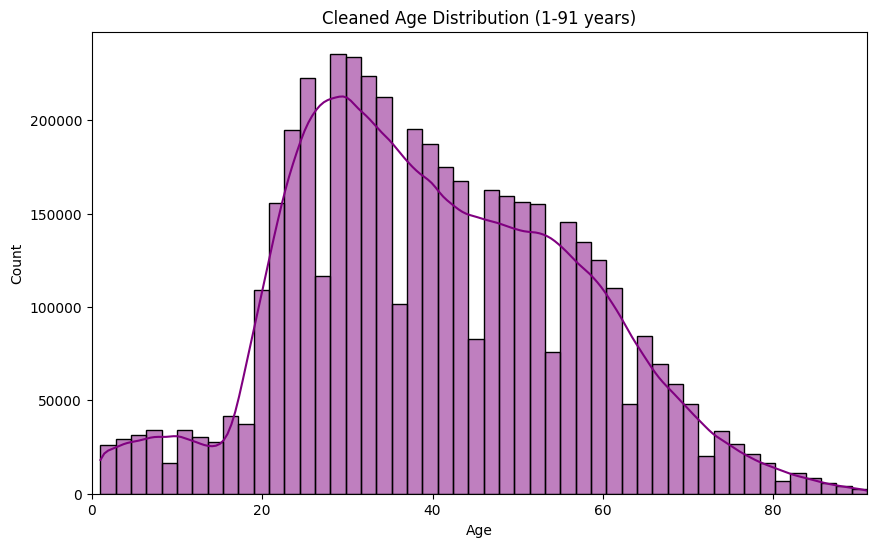

In [43]:
#  CLEAN THE DATA
# Replace negatives and zeros with NaN
df.loc[df['PERSON_AGE'] <= 0, 'PERSON_AGE'] = np.nan

# Replace unrealistic ages (e.g., > 120) with NaN
# This removes the birth years (1980, 2000) and placeholders (9999)
df.loc[df['PERSON_AGE'] > 91, 'PERSON_AGE'] = np.nan

#  VISUALIZE THE CLEAN DISTRIBUTION
plt.figure(figsize=(10, 6))
sns.histplot(df['PERSON_AGE'], bins=50, kde=True, color='purple')
plt.title(f"Cleaned Age Distribution (1-91 years)")
plt.xlabel("Age")
plt.xlim(0, 91) # Lock x-axis to human limits
plt.show()

In [44]:
df['PERSON_AGE'].value_counts(dropna=False)


PERSON_AGE
NaN     1206628
30.0     119046
29.0     118070
28.0     117490
27.0     116679
         ...   
87.0       2603
88.0       2257
89.0       1769
90.0       1473
91.0       1075
Name: count, Length: 92, dtype: int64

In [45]:
print("🎯 EXACT DISTRIBUTION IMPUTATION FOR 1.2M MISSING VALUES:")
print("=" * 60)

# Your original distribution
age_distribution = {
    30.0: 119037, 29.0: 118060, 28.0: 117479, 27.0: 116663, 31.0: 114643,
    26.0: 113205, 32.0: 113162, 33.0: 110390, 25.0: 109105, 34.0: 107186,
    35.0: 105381, 36.0: 101774, 24.0: 101049, 37.0: 98892, 38.0: 96106,
    39.0: 94068, 23.0: 93786, 40.0: 92991, 41.0: 88317, 42.0: 86755,
    43.0: 84464, 22.0: 83252, 44.0: 82849, 45.0: 82644, 46.0: 81474,
    47.0: 81034, 48.0: 80302, 49.0: 79224, 50.0: 78514, 52.0: 77961,
    51.0: 77700, 53.0: 77209, 54.0: 76116, 55.0: 73731, 21.0: 72257,
    56.0: 71540, 57.0: 68242, 58.0: 66749, 59.0: 63923, 60.0: 61164,
    20.0: 60175, 61.0: 56911, 62.0: 53323, 19.0: 48633, 63.0: 48170,
    64.0: 44172, 65.0: 40348, 18.0: 37331, 66.0: 36288, 67.0: 33025,
    68.0: 30781, 69.0: 27912, 70.0: 25228, 17.0: 24752, 71.0: 22545,
    72.0: 20097, 10.0: 17707, 73.0: 17291, 8.0: 17007, 7.0: 16977,
    9.0: 16643, 16.0: 16610, 11.0: 16265, 74.0: 16077, 6.0: 15979,
    12.0: 15734, 5.0: 15495, 4.0: 15212, 13.0: 14459, 75.0: 14276,
    15.0: 14046, 3.0: 14000, 14.0: 13878, 1.0: 13477, 2.0: 12621,
    76.0: 12516, 77.0: 11225, 78.0: 9810, 79.0: 8770, 80.0: 7806,
    81.0: 6898, 82.0: 5867, 83.0: 5107, 84.0: 4641, 85.0: 3802,
    86.0: 3211, 87.0: 2603, 88.0: 2257, 89.0: 1769, 90.0: 1472,
    91.0: 1074
}

# Convert to probability distribution
ages = list(age_distribution.keys())
counts = list(age_distribution.values())
total_original_count = sum(counts)
probabilities = [count / total_original_count for count in counts]

print(f"📊 Distribution Analysis:")
print(f"  Total in original distribution: {total_original_count:,}")
print(f"  Missing values to impute: {df['PERSON_AGE'].isnull().sum():,}")
print(f"  Scale factor: {df['PERSON_AGE'].isnull().sum() / total_original_count:.1f}x")

# Sample from exact distribution
np.random.seed(42)
missing_mask = df['PERSON_AGE'].isnull()
random_ages = np.random.choice(ages, size=missing_mask.sum(), p=probabilities, replace=True)

# Apply imputation
df['PERSON_AGE_IMPUTED'] = df['PERSON_AGE'].copy()
df.loc[missing_mask, 'PERSON_AGE_IMPUTED'] = random_ages

print(f"✅ Imputed {missing_mask.sum():,} missing values")

🎯 EXACT DISTRIBUTION IMPUTATION FOR 1.2M MISSING VALUES:
📊 Distribution Analysis:
  Total in original distribution: 4,610,671
  Missing values to impute: 1,206,628
  Scale factor: 0.3x
✅ Imputed 1,206,628 missing values


In [46]:
df['PERSON_AGE_IMPUTED'].value_counts(dropna= False)

PERSON_AGE_IMPUTED
30.0    150005
29.0    148592
28.0    148565
27.0    147273
31.0    144310
         ...  
87.0      3273
88.0      2887
89.0      2227
90.0      1877
91.0      1364
Name: count, Length: 91, dtype: int64

In [47]:
print("🔍 ANALYZING PERSON_SEX COLUMN:")
print("=" * 50)

# Basic analysis
print(f"Total rows: {len(df):,}")
print(f"Missing values: {df['PERSON_SEX'].isnull().sum():,} ({(df['PERSON_SEX'].isnull().sum()/len(df))*100:.2f}%)")
print(f"Data type: {df['PERSON_SEX'].dtype}")

# Check current value distribution
print("\n📊 Current PERSON_SEX distribution:")
sex_distribution = df['PERSON_SEX'].value_counts(dropna=False)
print(sex_distribution)

# Check for any unusual values
unique_sex_values = df['PERSON_SEX'].unique()
print(f"\n🎯 Unique values: {unique_sex_values}")

🔍 ANALYZING PERSON_SEX COLUMN:
Total rows: 5,817,930
Missing values: 643,311 (11.06%)
Data type: object

📊 Current PERSON_SEX distribution:
PERSON_SEX
M      3154217
F      1576382
NaN     643311
U       444020
Name: count, dtype: int64

🎯 Unique values: ['U' 'F' 'M' nan]


In [48]:
print("🔍 COMPLETE PERSON_SEX ANALYSIS:")
print("=" * 50)

# Total dataset analysis
total_rows = len(df)
print(f"📊 TOTAL DATASET: {total_rows:,} rows")

# Current state
current_missing = df['PERSON_SEX'].isnull().sum()
current_non_missing = total_rows - current_missing

print(f"\n🎯 CURRENT STATE:")
print(f"   Non-missing values: {current_non_missing:,} ({(current_non_missing/total_rows)*100:.1f}%)")
print(f"   Missing values:     {current_missing:,} ({(current_missing/total_rows)*100:.1f}%)")

# Raw value distribution (exactly as stored)
print(f"\n📈 RAW VALUE DISTRIBUTION:")
raw_distribution = df['PERSON_SEX'].value_counts(dropna=False)
for value, count in raw_distribution.items():
    percentage = (count / total_rows) * 100
    print(f"   '{value}' → {count:>8,} ({percentage:5.1f}%)")

🔍 COMPLETE PERSON_SEX ANALYSIS:
📊 TOTAL DATASET: 5,817,930 rows

🎯 CURRENT STATE:
   Non-missing values: 5,174,619 (88.9%)
   Missing values:     643,311 (11.1%)

📈 RAW VALUE DISTRIBUTION:
   'M' → 3,154,217 ( 54.2%)
   'F' → 1,576,382 ( 27.1%)
   'nan' →  643,311 ( 11.1%)
   'U' →  444,020 (  7.6%)


In [49]:
# Fill NaN with 'U' and keep everything else as-is
df['PERSON_SEX'] = df['PERSON_SEX'].fillna('U')

print("✅ Done: All NaN PERSON_SEX values filled with 'U'")
print(df['PERSON_SEX'].value_counts(dropna=False))

✅ Done: All NaN PERSON_SEX values filled with 'U'
PERSON_SEX
M    3154217
F    1576382
U    1087331
Name: count, dtype: int64


In [50]:
print("🔍 ANALYZING EJECTION COLUMN:")
print("=" * 50)

# Basic analysis
print(f"Total rows: {len(df):,}")
print(f"Missing values: {df['EJECTION'].isnull().sum():,} ({(df['EJECTION'].isnull().sum()/len(df))*100:.2f}%)")
print(f"Data type: {df['EJECTION'].dtype}")

# Check current value distribution
print("\n📊 Current EJECTION distribution:")
ejection_distribution = df['EJECTION'].value_counts(dropna=False)
print(ejection_distribution)

# Check for any unusual values
unique_ejection_values = df['EJECTION'].unique()
print(f"\n🎯 Unique values: {unique_ejection_values}")

🔍 ANALYZING EJECTION COLUMN:
Total rows: 5,817,930
Missing values: 2,826,666 (48.59%)
Data type: object

📊 Current EJECTION distribution:
EJECTION
Not Ejected          2930499
NaN                  2826666
Ejected                29925
Does Not Apply         15888
Partially Ejected      12947
Trapped                 1464
Unknown                  541
Name: count, dtype: int64

🎯 Unique values: [nan 'Not Ejected' 'Ejected' 'Partially Ejected' 'Does Not Apply'
 'Trapped' 'Unknown']


In [51]:
df[['EJECTION','POSITION_IN_VEHICLE','EMOTIONAL_STATUS','PERSON_TYPE']].value_counts(dropna=False)

EJECTION        POSITION_IN_VEHICLE                                                                     EMOTIONAL_STATUS  PERSON_TYPE
NaN             NaN                                                                                     NaN               Occupant       2672815
Not Ejected     Driver                                                                                  Does Not Apply    Occupant       1757180
                Front passenger, if two or more persons, including the driver, are in the front seat    Does Not Apply    Occupant        297980
                Driver                                                                                  Conscious         Occupant        224194
                Right rear passenger or motorcycle sidecar passenger                                    Does Not Apply    Occupant        112830
                                                                                                                                          ...

In [52]:
print("🔍 COMPREHENSIVE EJECTION RELATIONSHIP ANALYSIS:")
print("=" * 60)

# First, let's see the current state
total_rows = len(df)
missing_ejection = df['EJECTION'].isnull().sum()
print(f"📊 Dataset: {total_rows:,} total rows")
print(f"🎯 Missing EJECTION: {missing_ejection:,} ({missing_ejection/total_rows*100:.1f}%)")
print(f"📈 Current EJECTION distribution:")
print(df['EJECTION'].value_counts(dropna=False))

🔍 COMPREHENSIVE EJECTION RELATIONSHIP ANALYSIS:
📊 Dataset: 5,817,930 total rows
🎯 Missing EJECTION: 2,826,666 (48.6%)
📈 Current EJECTION distribution:
EJECTION
Not Ejected          2930499
NaN                  2826666
Ejected                29925
Does Not Apply         15888
Partially Ejected      12947
Trapped                 1464
Unknown                  541
Name: count, dtype: int64


In [53]:
print("🔄 Filling missing EJECTION values...")
print("=" * 40)

# Create final column
df['EJECTION_FINAL'] = df['EJECTION'].copy()
missing_count = df['EJECTION_FINAL'].isnull().sum()

print(f"Missing values: {missing_count:,}")

# Fill missing values based on PERSON_TYPE + PERSON_INJURY groups
for person_type in df['PERSON_TYPE'].unique():
    for person_injury in df['PERSON_INJURY'].unique():
        # Find missing values in this group
        mask = (
            (df['PERSON_TYPE'] == person_type) &
            (df['PERSON_INJURY'] == person_injury) &
            df['EJECTION_FINAL'].isnull()
        )

        if mask.sum() > 0:
            # Get this group's distribution from known data
            group_data = df[
                (df['PERSON_TYPE'] == person_type) &
                (df['PERSON_INJURY'] == person_injury) &
                df['EJECTION_FINAL'].notnull()
            ]

            if len(group_data) > 0:
                # Sample from group's distribution
                dist = group_data['EJECTION_FINAL'].value_counts(normalize=True)
                values = np.random.choice(dist.index, size=mask.sum(), p=dist.values)
                df.loc[mask, 'EJECTION_FINAL'] = values

# Fill any remaining with overall most common
remaining = df['EJECTION_FINAL'].isnull().sum()
if remaining > 0:
    most_common = df['EJECTION_FINAL'].mode()[0]
    df['EJECTION_FINAL'] = df['EJECTION_FINAL'].fillna(most_common)

print(f"✅ Done! Filled {missing_count:,} missing values")
print(f"📊 Final distribution:")
print(df['EJECTION_FINAL'].value_counts())

🔄 Filling missing EJECTION values...
Missing values: 2,826,666
✅ Done! Filled 2,826,666 missing values
📊 Final distribution:
EJECTION_FINAL
Not Ejected          5684411
Does Not Apply         67009
Ejected                41972
Partially Ejected      20811
Trapped                 2432
Unknown                 1295
Name: count, dtype: int64


In [54]:
print("🔄 Filling missing EMOTIONAL_STATUS values...")
print("=" * 40)

# Create final column
df['EMOTIONAL_STATUS_FINAL'] = df['EMOTIONAL_STATUS'].copy()
missing_count = df['EMOTIONAL_STATUS_FINAL'].isnull().sum()

print(f"Missing values: {missing_count:,}")

# Apply smart imputation rules first
mask1 = (
    df['EMOTIONAL_STATUS_FINAL'].isnull() &
    (df['PERSON_INJURY'] == 'unspecified') &
    (df['PERSON_TYPE'] == 'occupant')
)
df.loc[mask1, 'EMOTIONAL_STATUS_FINAL'] = 'Does Not Apply'

mask2 = (
    df['EMOTIONAL_STATUS_FINAL'].isnull() &
    (df['PERSON_INJURY'] == 'injured') &
    (df['PERSON_TYPE'] == 'occupant')
)
df.loc[mask2, 'EMOTIONAL_STATUS_FINAL'] = 'Conscious'

mask3 = (
    df['EMOTIONAL_STATUS_FINAL'].isnull() &
    (df['PERSON_INJURY'] == 'injured') &
    (df['PERSON_TYPE'] == 'pedestrian')
)
df.loc[mask3, 'EMOTIONAL_STATUS_FINAL'] = 'Conscious'

# Fill remaining missing values with distribution-based sampling
for person_type in df['PERSON_TYPE'].unique():
    for person_injury in df['PERSON_INJURY'].unique():
        # Find missing values in this group
        mask = (
            (df['PERSON_TYPE'] == person_type) &
            (df['PERSON_INJURY'] == person_injury) &
            df['EMOTIONAL_STATUS_FINAL'].isnull()
        )

        if mask.sum() > 0:
            # Get this group's distribution from known data
            group_data = df[
                (df['PERSON_TYPE'] == person_type) &
                (df['PERSON_INJURY'] == person_injury) &
                df['EMOTIONAL_STATUS_FINAL'].notnull()
            ]

            if len(group_data) > 0:
                # Sample from group's distribution
                dist = group_data['EMOTIONAL_STATUS_FINAL'].value_counts(normalize=True)
                values = np.random.choice(dist.index, size=mask.sum(), p=dist.values)
                df.loc[mask, 'EMOTIONAL_STATUS_FINAL'] = values

# Fill any remaining with 'unknown'
remaining = df['EMOTIONAL_STATUS_FINAL'].isnull().sum()
if remaining > 0:
    df['EMOTIONAL_STATUS_FINAL'] = df['EMOTIONAL_STATUS_FINAL'].fillna('unknown')

print(f"✅ Done! Filled {missing_count:,} missing values")
print(f"📊 Final distribution:")
print(df['EMOTIONAL_STATUS_FINAL'].value_counts())

🔄 Filling missing EMOTIONAL_STATUS values...
Missing values: 2,729,747
✅ Done! Filled 2,729,747 missing values
📊 Final distribution:
EMOTIONAL_STATUS_FINAL
Does Not Apply    5020620
Conscious          734030
Unknown             24692
Shock               24021
Semiconscious        4243
Unconscious          4223
Apparent Death       3259
Incoherent           2842
Name: count, dtype: int64


In [55]:
df[['EMOTIONAL_STATUS','PERSON_INJURY','PERSON_TYPE']].value_counts(dropna=False)

EMOTIONAL_STATUS  PERSON_INJURY  PERSON_TYPE    
NaN               Unspecified    Occupant           2534791
Does Not Apply    Unspecified    Occupant           2494522
Conscious         Injured        Occupant            353970
NaN               Injured        Occupant            137653
Conscious         Injured        Pedestrian           82887
                                                     ...   
Apparent Death    Unspecified    Bicyclist                1
Shock             Killed         Other Motorized          1
Semiconscious     Killed         Other Motorized          1
Does Not Apply    Killed         Bicyclist                1
Unknown           Unspecified    Other Motorized          1
Name: count, Length: 88, dtype: int64

In [56]:
df[['EMOTIONAL_STATUS_FINAL','PERSON_INJURY','PERSON_TYPE']].value_counts()


EMOTIONAL_STATUS_FINAL  PERSON_INJURY  PERSON_TYPE    
Does Not Apply          Unspecified    Occupant           4995674
Conscious               Injured        Occupant            480970
                                       Pedestrian          120430
                        Unspecified    Occupant             63580
                        Injured        Bicyclist            59536
                                                           ...   
Apparent Death          Unspecified    Bicyclist                1
Semiconscious           Killed         Other Motorized          1
Does Not Apply          Killed         Bicyclist                1
Shock                   Killed         Other Motorized          1
Unknown                 Unspecified    Other Motorized          1
Name: count, Length: 79, dtype: int64

In [57]:
df.head(10)

,COLLISION_ID,PERSON_TYPE,PERSON_INJURY,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,...,CONTRIBUTING_FACTOR_2,PERSON_SEX,CRASH_DATETIME,PED_ROLE_ENHANCED,PED_ROLE_copy,PED_ROLE_mask,PED_ROLE_FINAL,PERSON_AGE_IMPUTED,EJECTION_FINAL,EMOTIONAL_STATUS_FINAL
0,4229554,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,U,2019-10-26 09:43:00,Registrant,Registrant,Registrant,Registrant,39.0,Not Ejected,Does Not Apply
1,4230587,Occupant,Unspecified,33.0,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,...,NaN,F,2019-10-25 15:15:00,Passenger,Passenger,Passenger,Passenger,33.0,Not Ejected,Does Not Apply
2,4230550,Occupant,Unspecified,55.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M,2019-10-26 17:55:00,Registrant,Registrant,Registrant,Registrant,55.0,Not Ejected,Does Not Apply
3,3565527,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,U,2016-11-21 13:05:00,Notified Person,Notified Person,Notified Person,Notified Person,12.0,Not Ejected,Does Not Apply
4,4231168,Occupant,Unspecified,7.0,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,...,NaN,F,2019-10-25 11:16:00,Passenger,Passenger,Passenger,Passenger,7.0,Not Ejected,Does Not Apply
5,4230743,Occupant,Injured,27.0,Not Ejected,Conscious,Back,Driver,Lap Belt & Harness,NaN,...,NaN,M,2019-10-24 19:15:00,Driver,Driver,Driver,Driver,27.0,Not Ejected,Conscious
6,4230047,Occupant,Unspecified,41.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,F,2019-10-26 16:45:00,Registrant,Registrant,Registrant,Registrant,41.0,Not Ejected,Does Not Apply
7,4229547,Pedestrian,Injured,24.0,NaN,Conscious,Shoulder - Upper Arm,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,Unspecified,F,2019-10-26 01:15:00,Pedestrian,Pedestrian,Pedestrian,Pedestrian,24.0,Not Ejected,Conscious
8,4229808,Occupant,Unspecified,36.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt & Harness,NaN,...,NaN,M,2019-10-26 13:04:00,Driver,Driver,Driver,Driver,36.0,Not Ejected,Does Not Apply
9,4230915,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,U,2019-10-24 08:20:00,Registrant,Registrant,Registrant,Registrant,57.0,Not Ejected,Does Not Apply


In [58]:
df['POSITION_IN_VEHICLE'].value_counts(dropna=False)

POSITION_IN_VEHICLE
NaN                                                                                       2826210
Driver                                                                                    2089318
Front passenger, if two or more persons, including the driver, are in the front seat       365169
Right rear passenger or motorcycle sidecar passenger                                       148783
Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile                139332
Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc      81785
Unknown                                                                                     73742
Middle rear seat, or passenger lying across a seat                                          45044
Middle front seat, or passenger lying across a seat                                         36118
Riding/Hanging on Outside                                                                    8181


In [59]:
df[['POSITION_IN_VEHICLE','PERSON_INJURY','PERSON_TYPE']].value_counts(dropna=False)

POSITION_IN_VEHICLE                                                                   PERSON_INJURY  PERSON_TYPE
NaN                                                                                   Unspecified    Occupant       2535090
Driver                                                                                Unspecified    Occupant       1790511
Front passenger, if two or more persons, including the driver, are in the front seat  Unspecified    Occupant        303338
Driver                                                                                Injured        Occupant        232365
NaN                                                                                   Injured        Occupant        138170
                                                                                                                     ...   
Middle front seat, or passenger lying across a seat                                   Killed         Pedestrian           1
Riding/Hanging on O

In [60]:
print("🔄 Distributing missing POSITION_IN_VEHICLE values...")
print("=" * 50)

# Create final column
df['POSITION_IN_VEHICLE_FINAL'] = df['POSITION_IN_VEHICLE'].copy()
missing_count = df['POSITION_IN_VEHICLE_FINAL'].isnull().sum()

print(f"Missing POSITION_IN_VEHICLE values: {missing_count:,}")

# Fill missing values based on PERSON_TYPE + PERSON_INJURY groups
for person_type in df['PERSON_TYPE'].unique():
    for person_injury in df['PERSON_INJURY'].unique():
        # Find missing values in this group
        mask = (
            (df['PERSON_TYPE'] == person_type) &
            (df['PERSON_INJURY'] == person_injury) &
            df['POSITION_IN_VEHICLE_FINAL'].isnull()
        )

        missing_in_group = mask.sum()
        if missing_in_group > 0:
            # Get this group's distribution from known data
            group_data = df[
                (df['PERSON_TYPE'] == person_type) &
                (df['PERSON_INJURY'] == person_injury) &
                df['POSITION_IN_VEHICLE_FINAL'].notnull()
            ]

            if len(group_data) > 0:
                # Calculate distribution proportions
                dist = group_data['POSITION_IN_VEHICLE_FINAL'].value_counts(normalize=True)

                # Sample from group's distribution
                values = np.random.choice(dist.index, size=missing_in_group, p=dist.values)
                df.loc[mask, 'POSITION_IN_VEHICLE_FINAL'] = values

                print(f"✅ Filled {missing_in_group:,} missing values for {person_type}+{person_injury}")
                print(f"   Distribution: {dict(dist)}")
            else:
                print(f"⚠️ No data for {person_type}+{person_injury} - {missing_in_group:,} remain")

# Fill any remaining with overall most common
remaining = df['POSITION_IN_VEHICLE_FINAL'].isnull().sum()
if remaining > 0:
    most_common = df['POSITION_IN_VEHICLE_FINAL'].mode()[0]
    df['POSITION_IN_VEHICLE_FINAL'] = df['POSITION_IN_VEHICLE_FINAL'].fillna(most_common)
    print(f"Filled final {remaining:,} with overall most common: '{most_common}'")

print(f"\n✅ Done! Filled {missing_count:,} missing values")
print(f"📊 Final distribution:")
print(df['POSITION_IN_VEHICLE_FINAL'].value_counts())

🔄 Distributing missing POSITION_IN_VEHICLE values...
Missing POSITION_IN_VEHICLE values: 2,826,210
✅ Filled 2,535,090 missing values for Occupant+Unspecified
   Distribution: {'Driver': np.float64(0.7083504930730038), 'Front passenger, if two or more persons, including the driver, are in the front seat': np.float64(0.12000463659132997), 'Right rear passenger or motorcycle sidecar passenger': np.float64(0.04545125466873493), 'Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile': np.float64(0.04294543815985875), 'Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc': np.float64(0.02935017697774159), 'Unknown': np.float64(0.025744159061984344), 'Middle rear seat, or passenger lying across a seat': np.float64(0.01451268910824344), 'Middle front seat, or passenger lying across a seat': np.float64(0.012116061951506477), 'Does Not Apply': np.float64(0.0007101264024996449), 'Riding/Hanging on Outside': np.float64(0.0005408037839649106),

In [61]:
df['POSITION_IN_VEHICLE_FINAL'].value_counts(dropna=False)

POSITION_IN_VEHICLE_FINAL
Driver                                                                                    3993580
Front passenger, if two or more persons, including the driver, are in the front seat       692667
Right rear passenger or motorcycle sidecar passenger                                       276825
Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile                260080
Unknown                                                                                    219754
Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc     159111
Middle rear seat, or passenger lying across a seat                                          85049
Middle front seat, or passenger lying across a seat                                         68867
Does Not Apply                                                                              42219
Riding/Hanging on Outside                                                                   

In [62]:
df[['BODILY_INJURY','PERSON_INJURY','PERSON_TYPE']].value_counts(dropna=False)

BODILY_INJURY         PERSON_INJURY  PERSON_TYPE    
NaN                   Unspecified    Occupant           2534803
Does Not Apply        Unspecified    Occupant           2526339
NaN                   Injured        Occupant            137652
Neck                  Injured        Occupant             80164
Back                  Injured        Occupant             78454
                                                         ...   
Hip-Upper Leg         Unspecified    Bicyclist                1
Knee-Lower Leg Foot   Unspecified    Other Motorized          1
Head                  Unspecified    Bicyclist                1
Shoulder - Upper Arm  Killed         Occupant                 1
Neck                  Killed         Other Motorized          1
Name: count, Length: 139, dtype: int64

In [63]:
print("🔄 Distributing missing BODILY_INJURY values...")
print("=" * 50)

# Create final column
df['BODILY_INJURY_FINAL'] = df['BODILY_INJURY'].copy()
missing_count = df['BODILY_INJURY_FINAL'].isnull().sum()

print(f"Missing BODILY_INJURY values: {missing_count:,}")

# Fill missing values based on PERSON_TYPE + PERSON_INJURY groups
for person_type in df['PERSON_TYPE'].unique():
    for person_injury in df['PERSON_INJURY'].unique():
        # Find missing values in this group
        mask = (
            (df['PERSON_TYPE'] == person_type) &
            (df['PERSON_INJURY'] == person_injury) &
            df['BODILY_INJURY_FINAL'].isnull()
        )

        missing_in_group = mask.sum()
        if missing_in_group > 0:
            # Get this group's distribution from known data
            group_data = df[
                (df['PERSON_TYPE'] == person_type) &
                (df['PERSON_INJURY'] == person_injury) &
                df['BODILY_INJURY_FINAL'].notnull()
            ]

            if len(group_data) > 0:
                # Calculate distribution proportions
                dist = group_data['BODILY_INJURY_FINAL'].value_counts(normalize=True)

                # Sample from group's distribution
                values = np.random.choice(dist.index, size=missing_in_group, p=dist.values)
                df.loc[mask, 'BODILY_INJURY_FINAL'] = values

                print(f"✅ Filled {missing_in_group:,} missing values for {person_type}+{person_injury}")
                print(f"   Distribution: {dict(dist)}")
            else:
                print(f"⚠️ No data for {person_type}+{person_injury} - {missing_in_group:,} remain")

# Fill any remaining with overall most common
remaining = df['BODILY_INJURY_FINAL'].isnull().sum()
if remaining > 0:
    most_common = df['BODILY_INJURY_FINAL'].mode()[0]
    df['BODILY_INJURY_FINAL'] = df['BODILY_INJURY_FINAL'].fillna(most_common)
    print(f"Filled final {remaining:,} with overall most common: '{most_common}'")

print(f"\n✅ Done! Filled {missing_count:,} missing values")
print(f"📊 Final distribution:")
print(df['BODILY_INJURY_FINAL'].value_counts())

🔄 Distributing missing BODILY_INJURY values...
Missing BODILY_INJURY values: 2,729,704
✅ Filled 2,534,803 missing values for Occupant+Unspecified
   Distribution: {'Does Not Apply': np.float64(0.9993405870081005), 'Unknown': np.float64(0.0003821193462357289), 'Head': np.float64(0.00017167680772909558), 'Neck': np.float64(3.124992583087224e-05), 'Back': np.float64(3.00632197866619e-05), 'Knee-Lower Leg Foot': np.float64(9.098079672279258e-06), 'Shoulder - Upper Arm': np.float64(9.098079672279258e-06), 'Entire Body': np.float64(5.9335302210516905e-06), 'Face': np.float64(4.746824176841352e-06), 'Elbow-Lower-Arm-Hand': np.float64(4.746824176841352e-06), 'Chest': np.float64(4.351255495437906e-06), 'Abdomen - Pelvis': np.float64(3.5601181326310143e-06), 'Hip-Upper Leg': np.float64(1.9778434070172303e-06), 'Eye': np.float64(7.911373628068921e-07)}
✅ Filled 137,652 missing values for Occupant+Injured
   Distribution: {'Neck': np.float64(0.20898082613172747), 'Back': np.float64(0.2045229995177

In [64]:
df['COMPLAINT'].value_counts(dropna=False)

COMPLAINT
NaN                                   2729697
Does Not Apply                        2551247
Complaint of Pain or Nausea            245854
Complaint of Pain                       88490
None Visible                            55953
Minor Bleeding                          29531
Contusion - Bruise                      24013
Unknown                                 23399
Whiplash                                22721
Abrasion                                17142
Internal                                 8640
Fracture - Distorted - Dislocation       7014
Concussion                               3856
Severe Bleeding                          3204
Fracture - Dislocation                   1901
Crush Injuries                           1815
Severe Lacerations                       1472
Minor Burn                               1414
Moderate Burn                             241
Amputation                                176
Severe Burn                               118
Paralysis               

In [65]:
df[['COMPLAINT','PERSON_INJURY','PERSON_TYPE']].value_counts(dropna=False)

COMPLAINT                    PERSON_INJURY  PERSON_TYPE    
NaN                          Unspecified    Occupant           2534803
Does Not Apply               Unspecified    Occupant           2528006
Complaint of Pain or Nausea  Injured        Occupant            186287
NaN                          Injured        Occupant            137651
Complaint of Pain            Injured        Occupant             67620
                                                                ...   
Contusion - Bruise           Killed         Other Motorized          1
Paralysis                    Killed         Bicyclist                1
Moderate Burn                Killed         Occupant                 1
Minor Burn                   Killed         Pedestrian               1
Severe Lacerations           Killed         Other Motorized          1
Name: count, Length: 149, dtype: int64

In [66]:
print("🔄 Distributing missing COMPLAINT values...")
print("=" * 50)

# Create final column
df['COMPLAINT_FINAL'] = df['COMPLAINT'].copy()
missing_count = df['COMPLAINT_FINAL'].isnull().sum()

print(f"Missing COMPLAINT values: {missing_count:,}")

# Fill missing values based on PERSON_TYPE + PERSON_INJURY groups
for person_type in df['PERSON_TYPE'].unique():
    for person_injury in df['PERSON_INJURY'].unique():
        # Find missing values in this group
        mask = (
            (df['PERSON_TYPE'] == person_type) &
            (df['PERSON_INJURY'] == person_injury) &
            df['COMPLAINT_FINAL'].isnull()
        )

        missing_in_group = mask.sum()
        if missing_in_group > 0:
            # Get this group's distribution from known data
            group_data = df[
                (df['PERSON_TYPE'] == person_type) &
                (df['PERSON_INJURY'] == person_injury) &
                df['COMPLAINT_FINAL'].notnull()
            ]

            if len(group_data) > 0:
                # Calculate distribution proportions
                dist = group_data['COMPLAINT_FINAL'].value_counts(normalize=True)

                # Sample from group's distribution
                values = np.random.choice(dist.index, size=missing_in_group, p=dist.values)
                df.loc[mask, 'COMPLAINT_FINAL'] = values

                print(f"✅ Filled {missing_in_group:,} missing values for {person_type}+{person_injury}")
                print(f"   Top 5 distribution: {dict(dist.head(5))}")
            else:
                print(f"⚠️ No data for {person_type}+{person_injury} - {missing_in_group:,} remain")

# Fill any remaining with overall most common
remaining = df['COMPLAINT_FINAL'].isnull().sum()
if remaining > 0:
    most_common = df['COMPLAINT_FINAL'].mode()[0]
    df['COMPLAINT_FINAL'] = df['COMPLAINT_FINAL'].fillna(most_common)
    print(f"Filled final {remaining:,} with overall most common: '{most_common}'")

print(f"\n✅ Done! Filled {missing_count:,} missing values")
print(f"📊 Final distribution:")
print(df['COMPLAINT_FINAL'].value_counts().head(10))

🔄 Distributing missing COMPLAINT values...
Missing COMPLAINT values: 2,729,697
✅ Filled 2,534,803 missing values for Occupant+Unspecified
   Top 5 distribution: {'Does Not Apply': np.float64(1.0)}
✅ Filled 137,651 missing values for Occupant+Injured
   Top 5 distribution: {'Complaint of Pain or Nausea': np.float64(0.485633322558108), 'Complaint of Pain': np.float64(0.1762792104192953), 'None Visible': np.float64(0.11513675846463467), 'Whiplash': np.float64(0.05773782834023295), 'Unknown': np.float64(0.050756525094109425)}
✅ Filled 386 missing values for Occupant+Killed
   Top 5 distribution: {'Internal': np.float64(0.5152963671128107), 'Crush Injuries': np.float64(0.15965583173996176), 'Severe Bleeding': np.float64(0.0994263862332696), 'Unknown': np.float64(0.06596558317399617), 'Severe Burn': np.float64(0.028680688336520075)}
✅ Filled 34 missing values for Pedestrian+Unspecified
   Top 5 distribution: {'Does Not Apply': np.float64(1.0)}
✅ Filled 41,205 missing values for Pedestrian+In

In [67]:
df['SAFETY_EQUIPMENT'].value_counts(dropna=False)


SAFETY_EQUIPMENT
NaN                                         3029317
Lap Belt & Harness                          1755284
Unknown                                      479807
Lap Belt                                     404305
Child Restraint Only                          47561
Air Bag Deployed/Lap Belt/Harness             20658
Other                                         16500
Helmet (Motorcycle Only)                      16291
Harness                                       13166
Helmet Only (In-Line Skater/Bicyclist)        12015
Air Bag Deployed                               7523
-                                              7182
Helmet/Other (In-Line Skater/Bicyclist)        3592
Air Bag Deployed/Lap Belt                      3450
Air Bag Deployed/Child Restraint                601
Stoppers Only (In-Line Skater/Bicyclist)        574
Pads Only (In-Line Skater/Bicyclist)            102
Lap Belt/Harness                                  2
Name: count, dtype: int64

In [68]:
df[['SAFETY_EQUIPMENT','PERSON_TYPE','PERSON_INJURY']].value_counts(dropna=False)

SAFETY_EQUIPMENT                  PERSON_TYPE      PERSON_INJURY
NaN                               Occupant         Unspecified      2664301
Lap Belt & Harness                Occupant         Unspecified      1543608
Unknown                           Occupant         Unspecified       407150
Lap Belt                          Occupant         Unspecified       355501
Lap Belt & Harness                Occupant         Injured           210373
                                                                     ...   
Air Bag Deployed/Child Restraint  Pedestrian       Injured                1
Child Restraint Only              Pedestrian       Unspecified            1
                                  Occupant         Killed                 1
Harness                           Other Motorized  Unspecified            1
Other                             Bicyclist        Killed                 1
Name: count, Length: 140, dtype: int64

In [69]:
# SMART SAFETY EQUIPMENT CLEANING BASED ON INJURY PATTERNS
print("CLEANING SAFETY EQUIPMENT BASED ON INJURY ANALYSIS...")

# Option 1: Replace NaN with "No Equipment" (since injury rate is meaningful)
df['SAFETY_EQUIPMENT'] = df['SAFETY_EQUIPMENT'].fillna('No Equipment')

# Option 2: Group similar categories for better analysis
safety_groups = {
    # Seat Belts (low injury rates ~12%)
    'Lap Belt & Harness': 'Seat Belt',
    'Lap Belt': 'Seat Belt',
    'Lap Belt/Harness': 'Seat Belt',
    'Harness': 'Seat Belt',

    # Air Bags (medium injury rates ~46-52%)
    'Air Bag Deployed': 'Air Bag',
    'Air Bag Deployed/Lap Belt': 'Air Bag + Seat Belt',
    'Air Bag Deployed/Lap Belt/Harness': 'Air Bag + Seat Belt',
    'Air Bag Deployed/Child Restraint': 'Air Bag + Child Restraint',

    # Helmets (high injury rates ~75-78% - expected for motorcycle/bike accidents)
    'Helmet (Motorcycle Only)': 'Helmet',
    'Helmet Only (In-Line Skater/Bicyclist)': 'Helmet',
    'Helmet/Other (In-Line Skater/Bicyclist)': 'Helmet',

    # Child Safety
    'Child Restraint Only': 'Child Restraint',

    # Protective Gear
    'Pads Only (In-Line Skater/Bicyclist)': 'Protective Gear',
    'Stoppers Only (In-Line Skater/Bicyclist)': 'Protective Gear',

    # Unknown/No Equipment
    'Unknown': 'Unknown',
    'No Equipment': 'No Equipment',  # Our filled NaN values
    '-': 'No Equipment',
    'Other': 'Other'
}

# Apply grouping
df['SAFETY_EQUIPMENT_GROUPED'] = df['SAFETY_EQUIPMENT'].map(safety_groups)

print(" CLEANING COMPLETE:")
print(f"- Replaced NaN with 'No Equipment'")
print(f"- Created grouped categories for better analysis")
print(f"- Original NaN count: 3,028,904 rows now classified as 'No Equipment'")

# Show new distribution
print("\nNEW SAFETY EQUIPMENT DISTRIBUTION:")
print(df['SAFETY_EQUIPMENT_GROUPED'].value_counts())

CLEANING SAFETY EQUIPMENT BASED ON INJURY ANALYSIS...
 CLEANING COMPLETE:
- Replaced NaN with 'No Equipment'
- Created grouped categories for better analysis
- Original NaN count: 3,028,904 rows now classified as 'No Equipment'

NEW SAFETY EQUIPMENT DISTRIBUTION:
SAFETY_EQUIPMENT_GROUPED
No Equipment                 3036499
Seat Belt                    2172757
Unknown                       479807
Child Restraint                47561
Helmet                         31898
Air Bag + Seat Belt            24108
Other                          16500
Air Bag                         7523
Protective Gear                  676
Air Bag + Child Restraint        601
Name: count, dtype: int64


In [70]:
missing = df.isnull().sum()
print(missing)

COLLISION_ID                       0
PERSON_TYPE                        0
PERSON_INJURY                      0
PERSON_AGE                   1206628
EJECTION                     2826666
EMOTIONAL_STATUS             2729747
BODILY_INJURY                2729704
POSITION_IN_VEHICLE          2826210
SAFETY_EQUIPMENT                   0
PED_LOCATION                 5715663
PED_ACTION                   5715764
COMPLAINT                    2729697
PED_ROLE                      194889
CONTRIBUTING_FACTOR_1        5717042
CONTRIBUTING_FACTOR_2        5717175
PERSON_SEX                         0
CRASH_DATETIME                     0
PED_ROLE_ENHANCED              57238
PED_ROLE_copy                 153145
PED_ROLE_mask                 179869
PED_ROLE_FINAL                     0
PERSON_AGE_IMPUTED                 0
EJECTION_FINAL                     0
EMOTIONAL_STATUS_FINAL             0
POSITION_IN_VEHICLE_FINAL          0
BODILY_INJURY_FINAL                0
COMPLAINT_FINAL                    0
S

In [71]:
df['CONTRIBUTING_FACTOR_1'].value_counts(dropna=False)

CONTRIBUTING_FACTOR_1
NaN                                                      5717042
Unspecified                                                70478
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      15602
Driver Inattention/Distraction                              3857
Failure to Yield Right-of-Way                               2654
Traffic Control Disregarded                                 1668
Alcohol Involvement                                         1429
Other Vehicular                                             1371
View Obstructed/Limited                                      674
Cell Phone (hand-Held)                                       372
Backing Unsafely                                             289
Passing or Lane Usage Improper                               270
Passenger Distraction                                        224
Passing Too Closely                                          217
Aggressive Driving/Road Rage                                 206
Uns

In [72]:
df['CONTRIBUTING_FACTOR_2'].value_counts(dropna=False)

CONTRIBUTING_FACTOR_2
NaN                                                      5717175
Unspecified                                                88228
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion       4470
Driver Inattention/Distraction                              1566
Failure to Yield Right-of-Way                               1402
Traffic Control Disregarded                                 1239
Other Vehicular                                              760
Alcohol Involvement                                          503
View Obstructed/Limited                                      490
Cell Phone (hand-Held)                                       196
Passing or Lane Usage Improper                               193
Driver Inexperience                                          164
Unsafe Speed                                                 161
Passing Too Closely                                          138
Following Too Closely                                        134
Bac

In [73]:
df['PED_LOCATION'].value_counts(dropna=False)

PED_LOCATION
NaN                                                          5715663
Pedestrian/Bicyclist/Other Pedestrian at Intersection          62707
Pedestrian/Bicyclist/Other Pedestrian Not at Intersection      32596
Does Not Apply                                                  4085
Unknown                                                         2879
Name: count, dtype: int64

In [74]:
df['PED_ACTION'].value_counts(dropna=False)

PED_ACTION
NaN                                                5715764
Crossing With Signal                                 38632
Crossing, No Signal, or Crosswalk                    17073
Crossing, No Signal, Marked Crosswalk                 8926
Other Actions in Roadway                              8042
Crossing Against Signal                               6996
Unknown                                               4867
Not in Roadway                                        4837
Does Not Apply                                        4514
Emerging from in Front of/Behind Parked Vehicle       3082
Working in Roadway                                    1521
Getting On/Off Vehicle Other Than School Bus          1388
Riding/Walking Along Highway With Traffic             1032
Playing in Roadway                                     578
Riding/Walking Along Highway Against Traffic           344
Pushing/Working on Car                                 254
Going to/From Stopped School Bus             

In [75]:
# DROP THE COLUMNS FIRST
columns_to_drop = [
    'PERSON_AGE',
    'EJECTION',
    'EMOTIONAL_STATUS',
    'BODILY_INJURY',
    'POSITION_IN_VEHICLE',
    'SAFETY_EQUIPMENT',
    'COMPLAINT',
    'PED_ROLE',
    'PED_ROLE_ENHANCED',
    'PED_ROLE_copy',
    'PED_ROLE_mask'
]

print("Dropping columns:")
for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(columns=[col])
        print(f"✅ Dropped: {col}")
    else:
        print(f"❌ Not found: {col}")

print(f"\nRemaining columns: {len(df.columns)}")
print(df.columns.tolist())

Dropping columns:
✅ Dropped: PERSON_AGE
✅ Dropped: EJECTION
✅ Dropped: EMOTIONAL_STATUS
✅ Dropped: BODILY_INJURY
✅ Dropped: POSITION_IN_VEHICLE
✅ Dropped: SAFETY_EQUIPMENT
✅ Dropped: COMPLAINT
✅ Dropped: PED_ROLE
✅ Dropped: PED_ROLE_ENHANCED
✅ Dropped: PED_ROLE_copy
✅ Dropped: PED_ROLE_mask

Remaining columns: 17
['COLLISION_ID', 'PERSON_TYPE', 'PERSON_INJURY', 'PED_LOCATION', 'PED_ACTION', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2', 'PERSON_SEX', 'CRASH_DATETIME', 'PED_ROLE_FINAL', 'PERSON_AGE_IMPUTED', 'EJECTION_FINAL', 'EMOTIONAL_STATUS_FINAL', 'POSITION_IN_VEHICLE_FINAL', 'BODILY_INJURY_FINAL', 'COMPLAINT_FINAL', 'SAFETY_EQUIPMENT_GROUPED']


In [76]:
# RENAME COLUMNS AND DROP UNWANTED ONES

# Define the column mapping
column_mapping = {
    'PERSON_AGE_IMPUTED': 'PERSON_AGE',
    'EJECTION_FINAL': 'EJECTION',
    'EMOTIONAL_STATUS_FINAL': 'EMOTIONAL_STATUS',
    'BODILY_INJURY_FINAL': 'BODILY_INJURY',
    'POSITION_IN_VEHICLE_FINAL': 'POSITION_IN_VEHICLE',
    'SAFETY_EQUIPMENT_GROUPED': 'SAFETY_EQUIPMENT',
    'COMPLAINT_FINAL': 'COMPLAINT',
    'PED_ROLE_FINAL': 'PED_ROLE'
}

# Rename the columns
df = df.rename(columns=column_mapping)

print("✅ Columns renamed:")
for old_name, new_name in column_mapping.items():
    if new_name in df.columns:
        print(f"  {old_name} → {new_name}")

print(f"\nFinal columns: {list(df.columns)}")

✅ Columns renamed:
  PERSON_AGE_IMPUTED → PERSON_AGE
  EJECTION_FINAL → EJECTION
  EMOTIONAL_STATUS_FINAL → EMOTIONAL_STATUS
  BODILY_INJURY_FINAL → BODILY_INJURY
  POSITION_IN_VEHICLE_FINAL → POSITION_IN_VEHICLE
  SAFETY_EQUIPMENT_GROUPED → SAFETY_EQUIPMENT
  COMPLAINT_FINAL → COMPLAINT
  PED_ROLE_FINAL → PED_ROLE

Final columns: ['COLLISION_ID', 'PERSON_TYPE', 'PERSON_INJURY', 'PED_LOCATION', 'PED_ACTION', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2', 'PERSON_SEX', 'CRASH_DATETIME', 'PED_ROLE', 'PERSON_AGE', 'EJECTION', 'EMOTIONAL_STATUS', 'POSITION_IN_VEHICLE', 'BODILY_INJURY', 'COMPLAINT', 'SAFETY_EQUIPMENT']


In [77]:
df.to_csv('data_cleaned/person_cleaned.csv', index=False)